## Project - Statistical Learning 

Submitted by: Dr. Shrishail S. Gajbhar as part of the Applied Statistics week project evaluation.

### Dataset Information:

**Name: insurance.csv**

**Domain: Healthcare**

**Aim: Applying the concepts and techniques learnt in the "Introduction to Python" and "Applied Statistics" modules to gain some valuable insights.**

## Learning Outcomes:

* Exploratory Data Analysis
* Practicing statistics using Python
* Hypothesis testing

### 1) Import the necessary libraries

In [1]:
import pandas as pd  # To read the dataset as dataframe
import seaborn as sns # For Data Visualization 
import matplotlib.pyplot as plt # Necessary module for plotting purpose
%matplotlib inline 
sns.set(color_codes=True) # In order to have uniformity in output plots
from scipy.stats import * # import all the methods of scipy.stats module
from statsmodels.stats.proportion import proportions_ztest # for proportion test

### 2) Read the dataset as Dataframe

In [2]:
df = pd.read_csv("insurance.csv")

 ### 3) Perform basic EDA

#### a) Print shape of the data

In [3]:
df.shape

(1338, 7)

#### b) Data type of each attribute

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### c) Checking the presence of missing values

##### c1) Using info() method

df.info() method can be helpful to see check the presence of non-null values by comparing each columns non-null entries with total entries for example, in this dataset case we can see that there are no null values present since total entries are 1338 and each column also has 1338 non null entries

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


##### c2) Using isnull() method

df.isnull() method is also useful to check the presence of non-null entries. You can get the exact count of how many null entries are present for each column by using sum() method along with df.isnull() as follows

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Treating the missing values

Since the data at hand doesn't show any missing values in any of the column attribute, there is no need for missing value treatment for this data. However, in case one finds the missing value in the data we can find them and treat them appropriately as per the need by choosing one the few possible ways:
* Filling missing values using fillna(), replace() and interpolate() functions
* Replacing the missing values with median of that particular column attribute

#### d) 5 point summary of numerical attributes 

Before, finding the 5 point summary of numnerical attributes, let us check whether all the numberical values are valid numbers


In [7]:
import numpy as np
df.select_dtypes('number')[~df.select_dtypes('number').applymap(np.isreal).all(1)]

# One can see that all the mumeric data is valid and we are good to go..!

,age,bmi,children,charges


##### d1) Using describe() method

In [8]:
df[df.select_dtypes('number').columns].describe()[-5:]

,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


##### d2) Using graphical approach

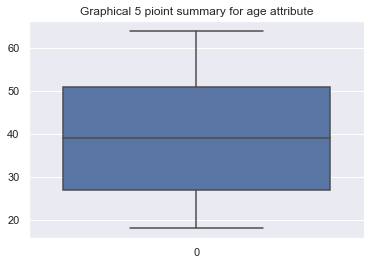

In [9]:
sns.boxplot(data = df['age'])
plt.title("Graphical 5 pioint summary for age attribute");

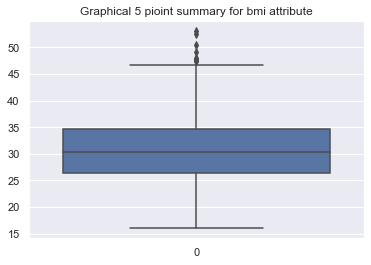

In [10]:
sns.boxplot(data = df['bmi'])
plt.title("Graphical 5 pioint summary for bmi attribute");

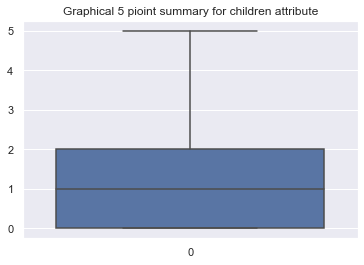

In [11]:
sns.boxplot(data = df['children'])
plt.title("Graphical 5 pioint summary for children attribute");

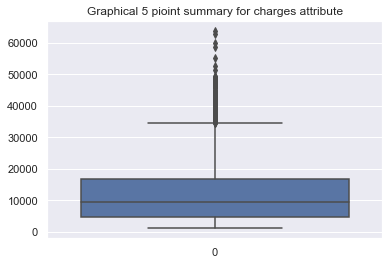

In [12]:
sns.boxplot(data = df['charges'])
plt.title("Graphical 5 pioint summary for charges attribute");

#### e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

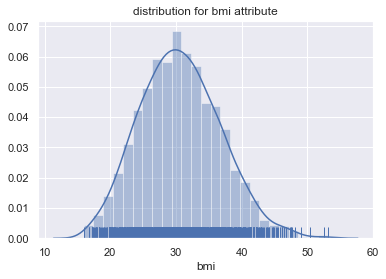

In [13]:
# plotting univariate distribution for bmi attribute
sns.distplot(df['bmi'],rug=True)
plt.title('distribution for bmi attribute');

# The distribution for bmi attribute follows a normal distribution

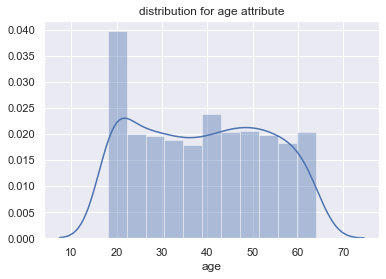

In [14]:
# plotting univariate distribution for age attribute
sns.distplot(df['age'])
plt.title('distribution for age attribute');

# One can oberve that the distribution for age attribute in this case seems to follow uniform-like distribution

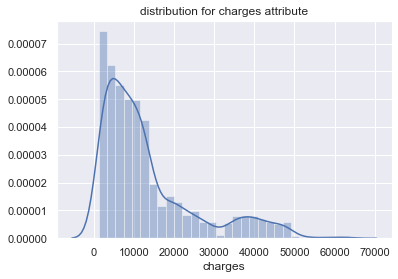

In [15]:
# plotting univariate distribution for charges attribute
sns.distplot(df['charges'])
plt.title('distribution for charges attribute');

# Distribution for charges atrribute is right-skewed normal-like distribution

#### f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

skewness shows asymmetry of distributions. One way to find skewness can be to use the *skew()* function which returns a skew value. The skew value can be interpreted as:
* if skew_value = 0, the distribution is symmetric
* if skew_value < 0, indicates distribution tail is larger towards the left hand side of the distribution and thus  is left skewed
* if skew_value > 0, indicates the distribution tail is larger towards the right hand side of the distribution and  thus is right skewed

In [16]:
df[['bmi','age','charges']].skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

From the above output, one can observe that all the mentioned column distributions are right-skewed with various degrees of variations. It is highest in case of 'charges' column, slight in case of 'bmi' where as nigligible in case of 'age' column

#### We can also use formulae to calculate the skewness. The formulae are:
* The distribiution is left skewed if 
    * (Median – Xsmallest > Xlargest  – Median)
    * (Q1 – Xsmallest > Xlargest  – Q3)
    * (Median – Q1 > Q3 – Median)
* The distribiution is symmetric if 
    * (Median – Xsmallest >= Xlargest  – Median)
    * (Q1 – Xsmallest = Xlargest  – Q3)
    * (Median – Q1 = Q3 – Median)
* The distribiution is right skewed if 
    * (Median – Xsmallest < Xlargest  – Median)
    * (Q1 – Xsmallest < Xlargest  – Q3)
    * (Median – Q1 < Q3 – Median)

In [17]:
# Let us check whether the distribution types using formulaes

x = df[df.select_dtypes('number').columns].describe()[-5:].transpose()


In [18]:
# since x is a dataframe let us calculate values for below quantities
# m1 = Median – Xsmallest 
# m2 = Xlargest – Median
# m3 = Q1 – Xsmallest
# m4 = Xlargest – Q3
# m5 = Median – Q1
# m6 = Q3 – Median

m1 = x['50%']-x['min']
m2 = x['max']-x['50%']
m3 = x['25%'] - x['min']
m4 = x['max'] - x['75%']
m5 = x['50%'] - x['25%']
m6 = x['75%'] - x['50%']

In [19]:
d = {'m1':m1,'m2':m2,'m3':m3,'m4':m4,'m5':m5,'m6':m6}
xd = pd.DataFrame(data=d)
xd.head()

,m1,m2,m3,m4,m5,m6
age,21.0000,25.00000,9.00000,13.000000,12.00000,12.000000
bmi,14.4400,22.73000,10.33625,18.436250,4.10375,4.293750
children,1.0000,4.00000,0.00000,3.000000,1.00000,1.000000
charges,8260.1591,54388.39501,3618.41325,47130.515495,4641.74585,7257.879515


#### In the above cell output, one can see that since $(m1<m2)$, $(m3<m4)$ and $(m5<m6)$ for age, bmi as well as charges and hence one can conclude that their distributions will be right-skewed. Measures given by skew() function also verfiy the right-skewness of the mentioned column distributions 

#### g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

Before plotting the boxplots for these columns, let us normalize them to find potential outliers

In [20]:
from scipy.stats import zscore


df_bac = df[['bmi','age','charges']]

df_bacz = df_bac.apply(zscore)

df_bacz.head()

,bmi,age,charges
0,-0.453320,-1.438764,0.298584
1,0.509621,-1.509965,-0.953689
2,0.383307,-0.797954,-0.728675
3,-1.305531,-0.441948,0.719843
4,-0.292556,-0.513149,-0.776802


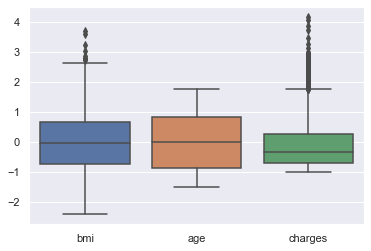

In [21]:
sns.boxplot(data=df_bacz);

# We can see that age column do not show any outliers, whereas bmi and charges columns show outliers over third
# quartile i.e., Q3.

#### For understanding purpose let us plot the boxplots for  age,bmi and charges individually also to determine outliers

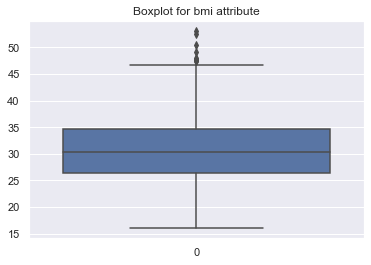

In [22]:
# Let us plot the boxplot for bmi attribute
sns.boxplot(data = df['bmi'])
plt.title("Boxplot for bmi attribute");

# One can see from the box plot, there are outliers present in this plot. Any value greater than Q3+ 1.5 * IQR 
# is considered as an outlier

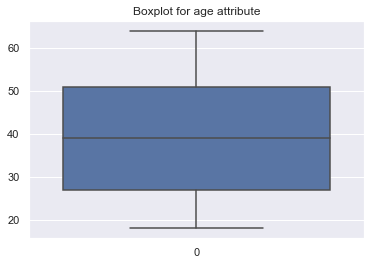

In [23]:
# Let us plot the boxplot for age attribute
sns.boxplot(data = df['age'])
plt.title("Boxplot for age attribute");

# One can see from the box plot, there are no outliers present in this plot. AAny value greater than Q3+ 1.5 * IQR 
# is considered as an outlier

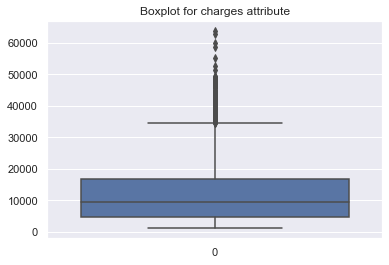

In [24]:
# Let us plot the boxplot for charges attribute
sns.boxplot(data = df['charges'])
plt.title("Boxplot for charges attribute");

# One can see from the box plot, there are outliers present in this plot. Any value greater than Q3+ 1.5 * IQR 
# is considered as an outlier

In [25]:
# let us calculate number of outliers present in these columns and print them

df_bac = df[['bmi','age','charges']].describe()[-5:].transpose()

In [26]:
df_bac.head()

,min,25%,50%,75%,max
bmi,15.9600,26.29625,30.400,34.693750,53.13000
age,18.0000,27.00000,39.000,51.000000,64.00000
charges,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [27]:
# Calculate the IQR as Q3-Q1
IQR = df_bac['75%']-df_bac['25%']
print(IQR)

# Let us find the cutoff values above which they will be considered as an outlier..
print("Any column entry above following values will be an outlier..")
print(df_bac['75%']+ 1.5*IQR)

bmi            8.397500
age           24.000000
charges    11899.625365
dtype: float64
Any column entry above following values will be an outlier..
bmi           47.290000
age           87.000000
charges    34489.350562
dtype: float64


In [28]:
# From boxplot we know that outliers are present in bmi and charges columns that to the right of Q3, 
# we only calculate number of outliers on the right hand side i.e, those greater than Q3+ 1.5 * IQR

no_bmi = df['bmi'][df['bmi']>df_bac['75%']['bmi']+1.5*IQR.bmi].count()
print("Number of outliers in bmi coumn are: ",no_bmi, "and the values are: ")
print(df['bmi'][df['bmi']>df_bac['75%']['bmi']+1.5*IQR.bmi])

Number of outliers in bmi coumn are:  9 and the values are: 
116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64


In [29]:
# Similarly, number of outliers in age column are: (should be zero as per the box plot)
no_age = df['age'][df['age']>df_bac['75%']['age']+1.5*IQR.age].count()
print("Number of outliers in age coumn are: ",no_age)

Number of outliers in age coumn are:  0


In [30]:
# Similarly, number of outliers in charges column are: (should be a large number as per the box plot)
no_charges = df['charges'][df['charges']>df_bac['75%']['charges']+1.5*IQR.charges].count()
print("Number of outliers in charges coumn are: ",no_charges, "and the values are: ")
print(df['charges'][df['charges']>df_bac['75%']['charges']+1.5*IQR.charges])

Number of outliers in charges coumn are:  139 and the values are: 
14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
34      51194.55914
38      39774.27630
39      48173.36100
49      38709.17600
53      37742.57570
55      47496.49445
82      37165.16380
84      39836.51900
86      43578.93940
94      47291.05500
109     47055.53210
123     39556.49450
146     40720.55105
158     36950.25670
161     36149.48350
175     48824.45000
185     43753.33705
203     37133.89820
223     34779.61500
240     38511.62830
242     35160.13457
251     47305.30500
252     44260.74990
254     41097.16175
256     43921.18370
           ...     
1062    48970.24760
1070    39871.70430
1078    34672.14720
1090    41676.08110
1096    44641.19740
1111    41949.24410
1117    36124.57370
1118    38282.74950
1122    46661.44240
1124    40904.19950
1139    36898.73308
1146    52590.82939
1152    40941.28540
1156    39722.74620
1186    37465.34375
1206    36910

#### Treatment for outliers

Since the outliers can possibly reduce the prediction accuracy of the model if used without proper treatment. Hence, one can replace the possible outlier values in coulmn attributess of the dataframe by
* dropping the entire observation (row in a dataframe) in which there is an outlier 
* Replacing outlier value with median of that column (usually a common approach)
* Replacing outlier value with twice of the standard deviation value (2*std) for that column attribute
* Using software packages such as MICE (Multivariate Imputation by Chained Equations) available in R language

#### Let us replace the outliers in charges column and see whether the how the new distribution looks like..


In [31]:
# Create a copy of df dataframe
df_copy = df.copy()
# We will modify the charges column entries in this to see new distribution
# Let us caluclate the median of charges column
charges_med = df_copy['charges'].median()
df_copy['charges'].replace(to_replace=df['charges'][df['charges']>df_bac['75%']['charges']+1.5*IQR.charges], value = df['charges'].median(), inplace = True)

# Check whether values are correctly replaced or not?
# 14      39611.75770 index 14 has this value in df dataframe, this should become median value
print(df['charges'][14])
print(df_copy['charges'][14])
# Perfectly fine
# The question is whether median is a good choice for replacing the outlier values in this case?

39611.7577
9382.033


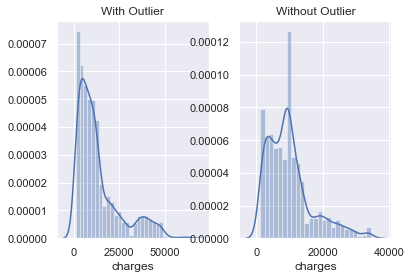

In [33]:
# Let us plot the the distributions of charges of df(with outliers) and df_copy (without outliers)
fig, ax =plt.subplots(1,2)
sns.distplot(df['charges'],ax=ax[0])
ax[0].set_title("With Outlier"); 
sns.distplot(df_copy['charges'],ax=ax[1])
ax[1].set_title("Without Outlier");

# One can observe that right-tail in with outlier plot is now reduced in without outlier plot.

#### h) Distribution of categorical columns (including children) using box plot, Scatter plot & Bar plots

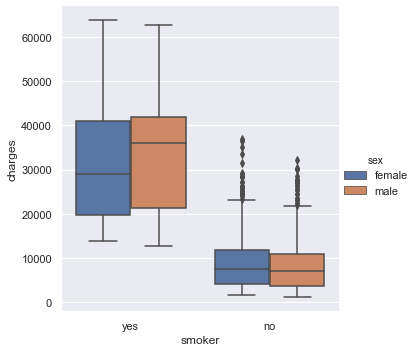

In [39]:
# Let us analyze categorical variables "smoker" and "sex" (as hue) with respect to "charges" as continuous variable
sns.catplot(x="smoker", y="charges", hue="sex", kind="box", data=df);
# One can observe that one belonging to smoker category is charged more than the non smoker irrespective of gender

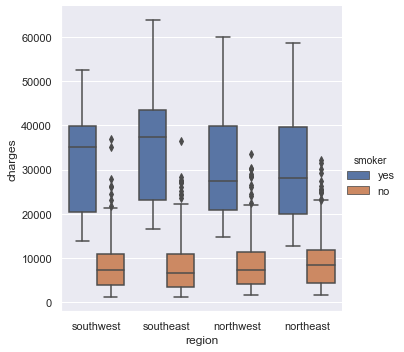

In [41]:
# Let us analyze categorical variables "region" and "smoker" (as hue) with respect to "charges" as continuous variable
sns.catplot(x="region", y="charges", hue="smoker", kind="box", data=df);
# One can observe that southeast charges relatively higher than other regions to smokers

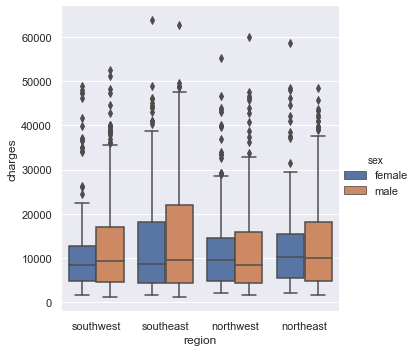

In [43]:
# Let us analyze categorical variables "region" and "sex" (as hue) with respect to charges as continuous variable
sns.catplot(x="region", y="charges", hue="sex", kind="box", data=df);
# One can observe that southeast has wider range of charges than other regions

In [44]:
# Let us analyze scatterplot between age and charges with smoker as a hue

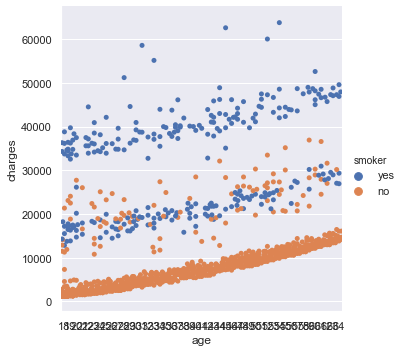

In [45]:
sns.catplot(x="age", y="charges", hue="smoker", kind="swarm", data=df);
# One can see that over increasing age charges incurred are more and smokers are charged relatively higher 
# than non-smoker

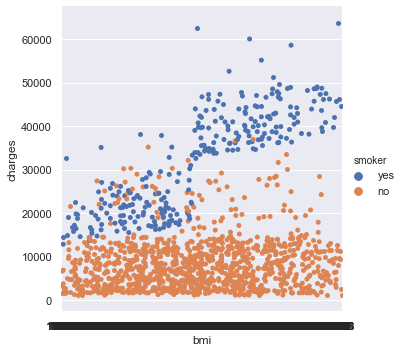

In [46]:
# Let us analyze scatterplot between bmi and charges with smoker as a hue
sns.catplot(x="bmi", y="charges", hue="smoker", kind="swarm", data=df);
# One can see that smokers with increasing bmi tend to pay more charges than non-smokers..!

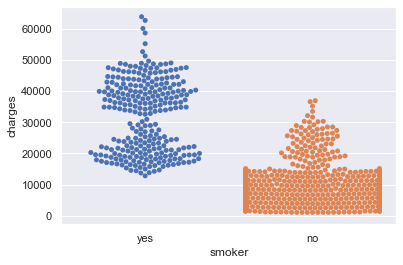

In [47]:
# Plotting swarmplot between charges and categorical variable smoker
sns.swarmplot(df['smoker'], df['charges']);

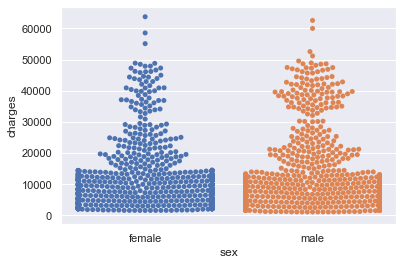

In [48]:
# Plotting swarmplot between charges and categorical variable sex
sns.swarmplot(df['sex'], df['charges']);

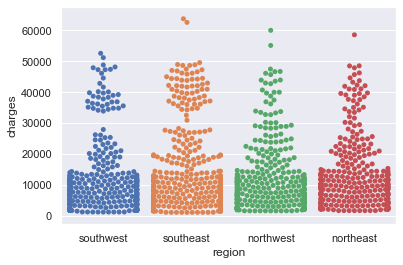

In [49]:
# Plotting swarmplot between charges and categorical variable region
sns.swarmplot(df['region'], df['charges']);

# region doesn't seem to play any major role in charges

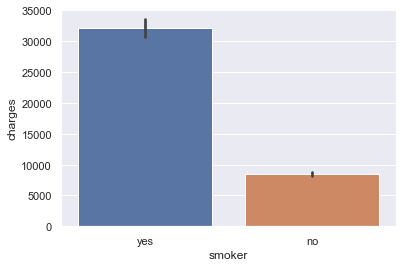

In [50]:
# Let's plot barplot between charges and smoker
sns.barplot(df['smoker'],df['charges']);

# One can see that smoker's tend to pay higher charges than non-smokers

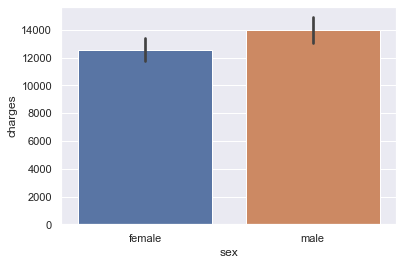

In [52]:
# Let's plot barplot between charges and sex
sns.barplot(df['sex'],df['charges']);

# One can see that males have wider range of charges than females

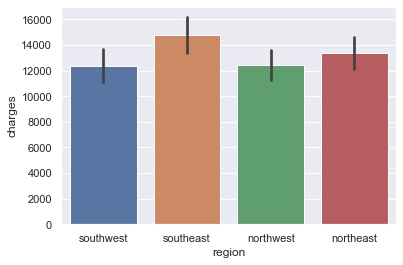

In [53]:
# Let's plot barplot between charges and region
sns.barplot(df['region'],df['charges']);

# Region doesn't seem to be a good choice to predict charges

#### i) Pair plot that includes all the columns of the data frame

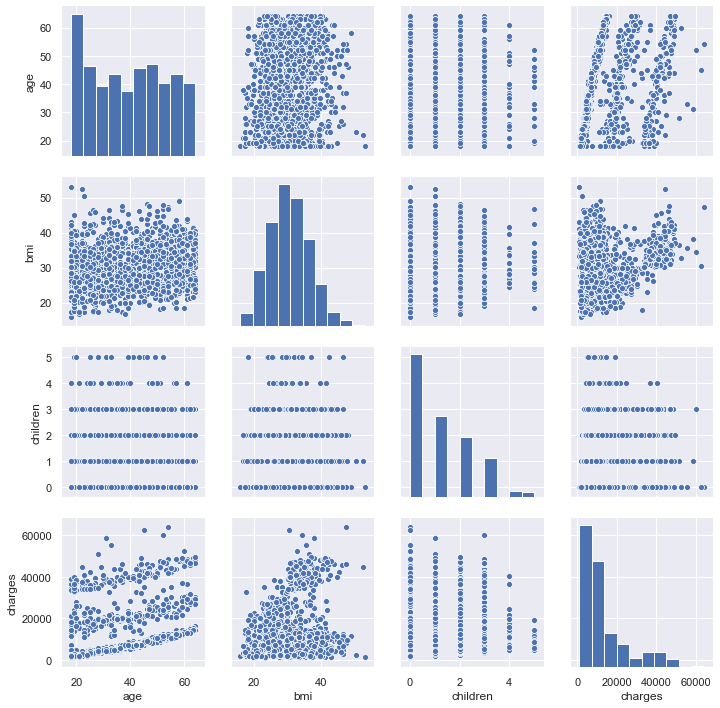

In [55]:
sns.pairplot(data=df);
# One can oberve that age and charges seem to have large correlation than other numeric attributes 

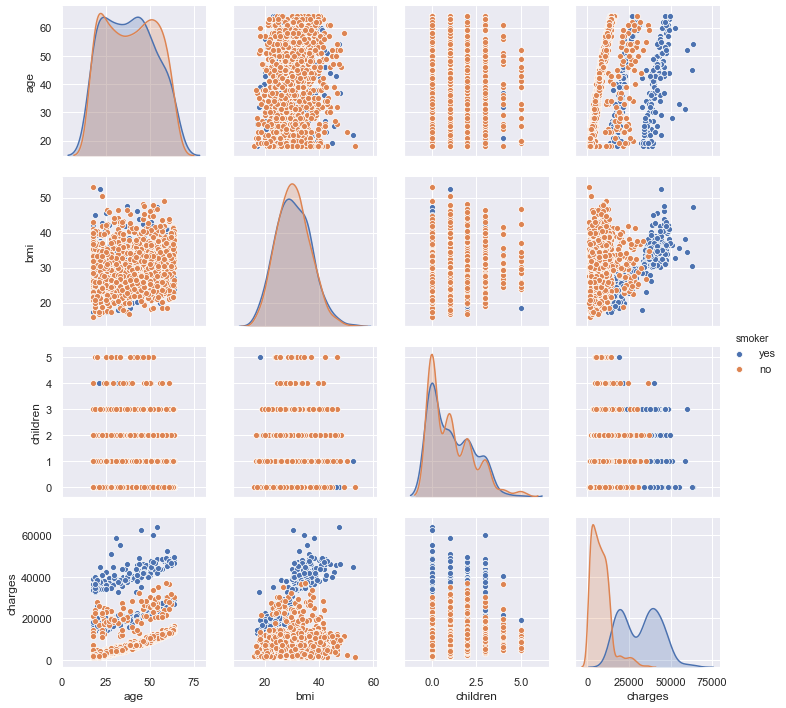

In [56]:
# Pairplot with smoker as hue
sns.pairplot(data=df, hue='smoker');
# One can oberve that smokers with increasing bmi's tend to pay more charges than non-smokers

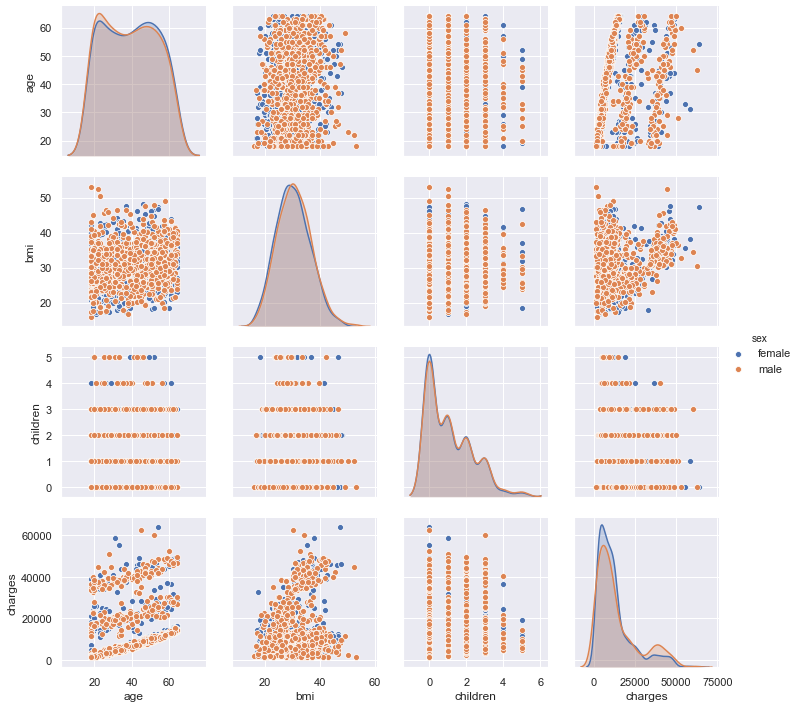

In [57]:
# Pairplot with sex as hue
sns.pairplot(data=df, hue='sex');
# One can oberve that smokers with increasing bmi's tend to pay more charges than non-smokers

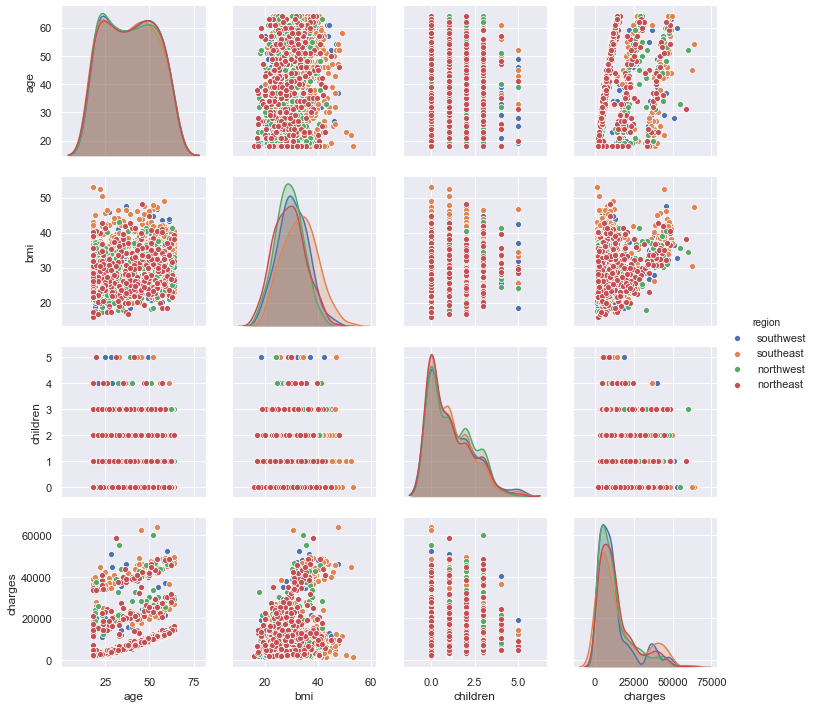

In [58]:
# Pairplot with region as hue
sns.pairplot(data=df, hue='region');
# One can oberve that the distributions of age,bmi,children and charges columns over region as a hue do not 
# provide any new information since they are fairly similar plots

#### Plotting correlation matrix using Seaborn's heatmap() function

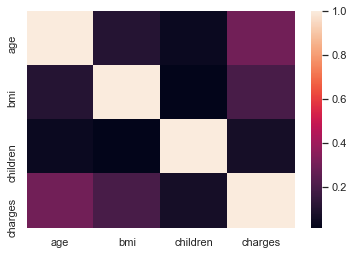

In [60]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

In [61]:
# Another way toprint correlation matrix
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# One can see that correlation coefficient for charges<----->age and charges<----->bmi is positive and high
# showing strong correlation among these quantities. bmi<--->age are also correlated. 

,age,bmi,children,charges
age,1,0.11,0.042,0.3
bmi,0.11,1,0.013,0.2
children,0.042,0.013,1,0.068
charges,0.3,0.2,0.068,1


### 4) Answer the following questions with statistical evidence

#### a) Do charges of people who smoke differ significantly from the people who don't?

We formulate our null and alternate hypothesis for this problem as follows:

**H0: Charges of people who smoke are same as people who don't**

**HA: Charges of people who smoke differ from those who don't**

We assume the level of significance in this case as $\alpha = 0.05$

Since standard deviation of the poulation is not known we go for the 2-sample t-test (independent) 

Step1: Seperating the data into 2 groups in this case smoker and non-smoker

In [62]:
# group1 : smoker
group1 = df[df['smoker']=='yes'].charges
# group2 : Non-smoker
group2 = df[df['smoker']=='no'].charges

In [63]:
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

# if p_value < 0.05, we reject the null hypothesis else we fail to reject the null hypothesis

46.664921172723716 8.271435842177219e-283


**Since the p_value << 0.05, we reject the null hypotheis or in other words we support the alternate hypothesis.**

**Thus, we can conclude that, with 95% (even 99%) confidence that charges of people who smoke differ significantly from the people who don't.**

#### b) Does bmi of males differ significantly from that of females?

We formulate our null and alternate hypothesis for this problem as follows:

**H0: bmi values for males and females are equal for the given population**

**H1: bmi values for males and females are not equal and differ significantly**

We assume the level of significance in this case as $\alpha = 0.05$

Since standard deviation of the poulation is not known we go for the 2-sample t-test (independent)

In [64]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [65]:
# group1_b:  bmi values for males only
group1_b = df[df['sex']=='male'].bmi

# group2_b:  bmi values for females only
group2_b = df[df['sex']=='female'].bmi

t_statistic, p_value = ttest_ind(group1_b, group2_b)
print(t_statistic, p_value)

# if p_value < 0.05, we reject the null hypothesis else we fail to reject the null hypothesis

1.696752635752224 0.08997637178984932


**Since the p_value > 0.05, we fail to reject the null hypotheis or in other words the claim made in null hypothesis stands valid for the given data.**

**Thus we can conclude with 95% confidence, that bmi values for males and females are equal for the given population**

#### c) Is the proportion of smokers significantly different in different genders? 

In [67]:
# In order to find the proportions, let us first calculate number of males and females
n_males = df[df['sex']=='male'].sex.count() # 676
n_females = df[df['sex']=='female'].sex.count()  # 662

# Let us calculate number of male smokers
ms_all = df[df['sex']=='male'].smoker
male_smokers = ms_all[ms_all=='yes']
# so number of males who smoke are 
n_male_smokers = male_smokers.count()
print("Number of male smokers are :",n_male_smokers,"and total number of males are :",n_males)

# Let us calculate number of female smokers
fs_all = df[df['sex']=='female'].smoker
female_smokers = fs_all[fs_all=='yes']
# so number of females who smoke are 
n_female_smokers = female_smokers.count()
print("Number of female smokers are :",n_female_smokers,"and total number of females are :",n_females)

# Calculate the proportions of male and female smokers..
male_smoker_prop = n_male_smokers/n_males
female_smoker_prop = n_female_smokers/n_females

print("Proportion of males who smoke is: {:.2}".format(float(male_smoker_prop)))
print("Proportion of females who smoke is: {:.2}".format(float(female_smoker_prop)))

# One can see that proportions are not equal however are they significantly different, statistically

# Let us carry out the z-proportions test

'''We formulate our null and alternate hypothesis for this problem as follows:

H0: smoker proportions are equal in different genders

H1: smoker proportions are not equal in different genders

We assume the level of significance in this case as alpha = 0.05
'''


stat, pval = proportions_ztest([n_male_smokers, n_female_smokers] , [n_males, n_females])
print("The value of p is ",pval)

Number of male smokers are : 159 and total number of males are : 676
Number of female smokers are : 115 and total number of females are : 662
Proportion of males who smoke is: 0.24
Proportion of females who smoke is: 0.17
The value of p is  0.005324114164320532


**Since the $p$ value < 0.05, we reject the null hypotheis or in other words alternative hypothesis is supported for the given data.**

**Thus we can conclude with 95% (even 99% also) confidence, that proportions of smokers are different in differnt genders**

#### d) Is the distribution of bmi across women with no children, one child and two children, the same?

Since we want to compare the distributions of two or more groups concerning bmi values, we will use one-way ANOVA test. 

But before that, let us plot the boxplots for the desired groups i.e., women with no, one and two children and take clue from the same.



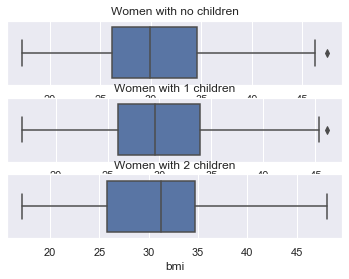

In [68]:
# Boxplots for group1: women with no children
# Boxplots for group2: women with 1 children
# Boxplots for group3: women with 2 children

grp1 = df[(df['sex']=='female') & (df['children']==0)]['bmi']
grp2 = df[(df['sex']=='female') & (df['children']==1)]['bmi']
grp3 = df[(df['sex']=='female') & (df['children']==2)]['bmi']

fig, ax =plt.subplots(3,1);
ax[0].set_title("Women with no children");
sns.boxplot(grp1,ax=ax[0]);
ax[1].set_title("Women with 1 children");
sns.boxplot(grp2,ax=ax[1]);
ax[2].set_title("Women with 2 children");
sns.boxplot(grp3,ax=ax[2]);

# From plots one can see the boxplots for females with no, one and two children are almost similar
# Let us check the same fact from the hypothesis testing..

We formulate our null and alternate hypothesis for this problem as follows:

**H0: distribution of bmi across women with no children, one child and two children are same**

**H1: distribution of bmi between at least two groups (out of women with one, two and children) are different**

We assume the level of significance in this case as $\alpha = 0.05$

In [69]:
f_stat, p_value_anova = stats.f_oneway(grp1,grp2,grp3)
print(p_value_anova)

0.7158579926754841


#### Since the $p$ value is greater than the $\alpha$, we fail to reject the null hypothesis or in other words null hypothesis stands .

#### so with 95% confidence, we can say that the distribution of bmi across women with no children, one child and two children are same or in other words number of children has no effect on bmi values of females